<a href="https://colab.research.google.com/github/dzeaulfath/Python/blob/main/Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Plotly visualizations
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# Data Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv',  low_memory=False) #Reading Data from Drive
pd.set_option('display.max_columns', None) #Displaying All Coloumn Data
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [ ]:
df.shape

(466285, 75)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
#pd.set_option('display.max_rows',None) #Displaying All Rows Data
df.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), '%_missing': 
(df.isnull().sum()/len(df))*100})
missing_data

,total_missing,%_missing
Unnamed: 0,0,0.000000
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
...,...,...
all_util,466285,100.000000
total_rev_hi_lim,70276,15.071469
inq_fi,466285,100.000000
total_cu_tl,466285,100.000000


In [ ]:
drop_col = {'Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
        'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
        'next_pymnt_d', 'mths_since_last_major_derog', 'emp_title', 'total_rev_hi_lim', 'tot_cur_bal',
        'tot_coll_amt', 'title', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'id', 'member_id', 'url',  'zip_code', 
        'sub_grade', 'addr_state' ,'inq_last_6mths',  'collections_12_mths_ex_med',}

df.drop(drop_col, axis=1, inplace=True)

In [ ]:
df.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                 21008
home_ownership                 0
annual_inc                     4
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                   29
open_acc                      29
pub_rec                       29
revol_bal                      0
revol_util                   340
total_acc                     29
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries

In [ ]:
#Deleting NaN Data

df.dropna(inplace=True)

In [ ]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
dti                        0
delinq_2yrs                0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
policy_code                0
application_ty

**Dealing With Outliers**

# Exploratory Data Analys And Data preprocessing

**Loan Status**

In [ ]:
df["loan_status"].value_counts()

Current                                                212443
Fully Paid                                             178253
Charged Off                                             40110
Late (31-120 days)                                       6494
In Grace Period                                          3042
Does not meet the credit policy. Status:Fully Paid       1935
Late (16-30 days)                                        1148
Default                                                   784
Does not meet the credit policy. Status:Charged Off       740
Name: loan_status, dtype: int64

In [ ]:
# Define New Status for Bad and Good Loan

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
df["loan_condition"] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good loan'
    
df["loan_condition"] = df["loan_status"].apply(loan_condition)

In [ ]:
df["loan_condition"].value_counts()

Good loan    392631
Bad Loan      52318
Name: loan_condition, dtype: int64

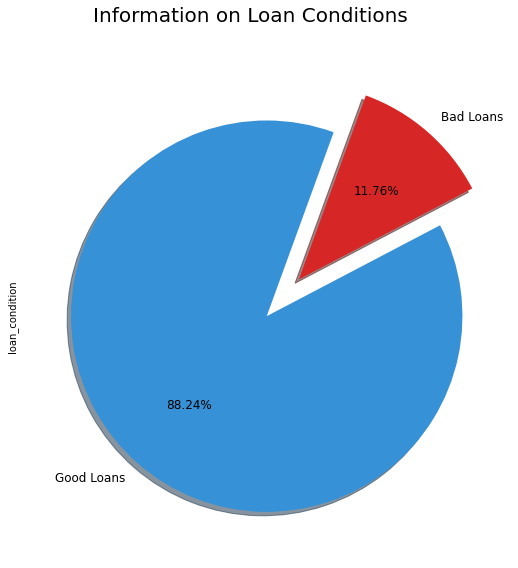

In [ ]:
# Let's plot the loan condition based on the above criteria:

f, ax = plt.subplots(figsize=(18, 9))

colors = ["#3791D7", "#D72626"]
labels = "Good Loans", "Bad Loans"

plt.suptitle("Information on Loan Conditions", fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0, 0.25], autopct="%1.2f%%",
                                            ax=ax,
                                            shadow=True,
                                            colors=colors, 
                                            labels=labels,
                                            fontsize=12,
                                            startangle=70)

**Term Condition**

In [ ]:
print(df.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df['term'] = df['term'].map(d)

 36 months    320509
 60 months    124440
Name: term, dtype: int64


**Grade and Sub-Grade**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Total committed by Investors')

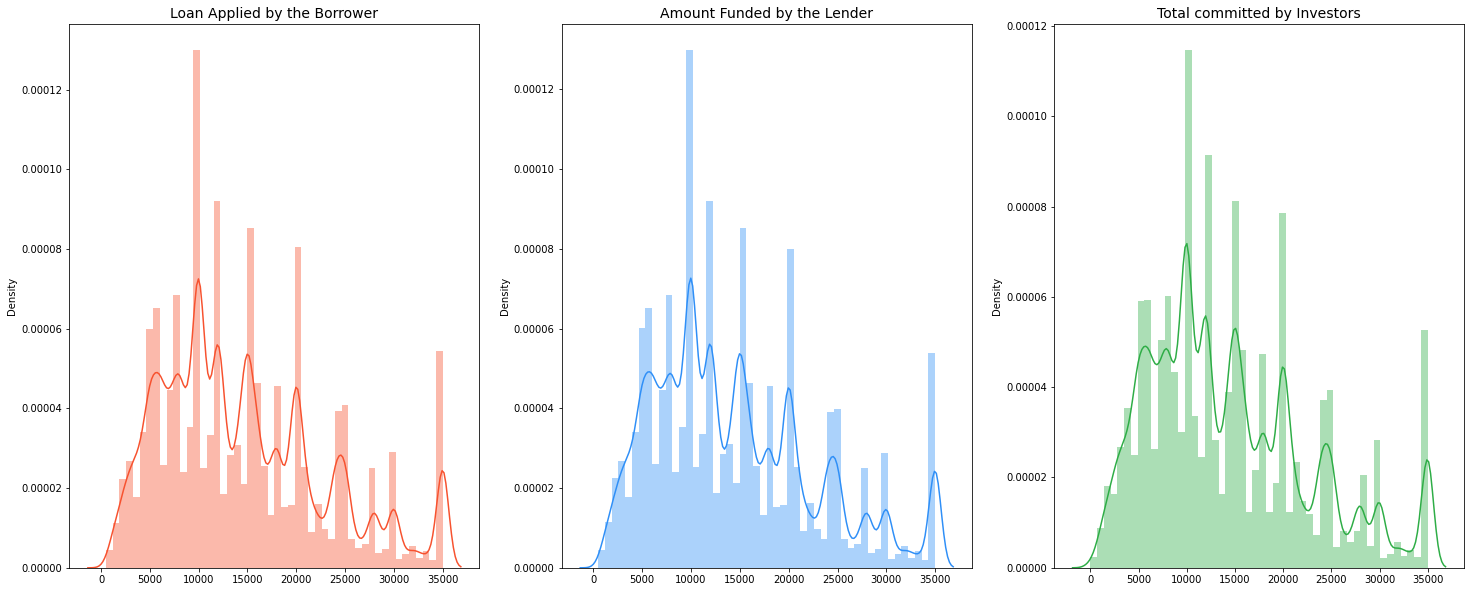

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25,10))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [ ]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'

In [ ]:
df['income_category'].value_counts()

Low       368385
Medium     68847
High        7717
Name: income_category, dtype: int64

In [ ]:
inc_cat = ['Low', 'Medium', 'High']

lst=[df]
df['income_category_int'] = np.nan

for col in lst:
    col.loc[col['income_category'] == 'Low', 'income_category_int'] = 1
    col.loc[col['income_category'] == 'Medium', 'income_category_int'] = 2
    col.loc[col['income_category'] == 'High', 'income_category_int'] = 3

In [ ]:
df['income_category_int'].value_counts()

1.0    368385
2.0     68847
3.0      7717
Name: income_category_int, dtype: int64

**Emp Length**

In [ ]:
df['emp_length'].value_counts()

10+ years    149952
2 years       41350
3 years       36573
< 1 year      36211
5 years       30756
1 year        29592
4 years       28001
7 years       26161
6 years       26094
8 years       22382
9 years       17877
Name: emp_length, dtype: int64

In [ ]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years']

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0

In [ ]:
df['emp_length_int'].value_counts()

10.0    149952
2.0      41350
3.0      36573
0.0      36211
5.0      30756
1.0      29592
4.0      28001
7.0      26161
6.0      26094
8.0      22382
9.0      17877
Name: emp_length_int, dtype: int64

**Loan Condition**

In [ ]:
le=LabelEncoder()
df['loan_condition_int']=le.fit_transform(df['loan_condition'])

In [ ]:
df['loan_condition_int'].value_counts()

1    392631
0     52318
Name: loan_condition_int, dtype: int64

In [ ]:
df['loan_condition_int']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: loan_condition_int, Length: 444949, dtype: int64

In [ ]:
df['loan_condition']

0         Good loan
1          Bad Loan
2         Good loan
3         Good loan
4         Good loan
            ...    
466280    Good loan
466281     Bad Loan
466282    Good loan
466283    Good loan
466284    Good loan
Name: loan_condition, Length: 444949, dtype: object

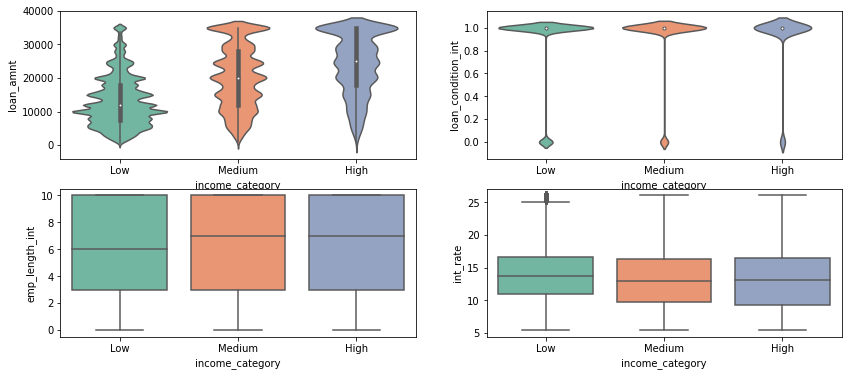

In [ ]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444949 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                444949 non-null  int64  
 1   funded_amnt              444949 non-null  int64  
 2   funded_amnt_inv          444949 non-null  float64
 3   term                     444949 non-null  int64  
 4   int_rate                 444949 non-null  float64
 5   installment              444949 non-null  float64
 6   grade                    444949 non-null  object 
 7   emp_length               444949 non-null  object 
 8   home_ownership           444949 non-null  object 
 9   annual_inc               444949 non-null  float64
 10  verification_status      444949 non-null  object 
 11  issue_d                  444949 non-null  object 
 12  loan_status              444949 non-null  object 
 13  pymnt_plan               444949 non-null  object 
 14  purp

In [ ]:
df['purpose'].value_counts()

debt_consolidation    262728
credit_card            98934
home_improvement       24981
other                  22246
major_purchase          9364
small_business          6842
car                     5158
medical                 4325
moving                  2824
vacation                2321
wedding                 2309
house                   2176
educational              410
renewable_energy         331
Name: purpose, dtype: int64

In [ ]:
purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='condition_purposes')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444949 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                444949 non-null  int64  
 1   funded_amnt              444949 non-null  int64  
 2   funded_amnt_inv          444949 non-null  float64
 3   term                     444949 non-null  int64  
 4   int_rate                 444949 non-null  float64
 5   installment              444949 non-null  float64
 6   grade                    444949 non-null  object 
 7   emp_length               444949 non-null  object 
 8   home_ownership           444949 non-null  object 
 9   annual_inc               444949 non-null  float64
 10  verification_status      444949 non-null  object 
 11  issue_d                  444949 non-null  object 
 12  loan_status              444949 non-null  object 
 13  pymnt_plan               444949 non-null  object 
 14  purp

**Home Ownership**

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    225858
RENT        180885
OWN          37983
OTHER          177
NONE            45
ANY              1
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership']=le.fit_transform(df['home_ownership'])

In [ ]:
df['home_ownership'].value_counts()

1    225858
5    180885
4     37983
3       177
2        45
0         1
Name: home_ownership, dtype: int64

**Delete duplicated coloumn**

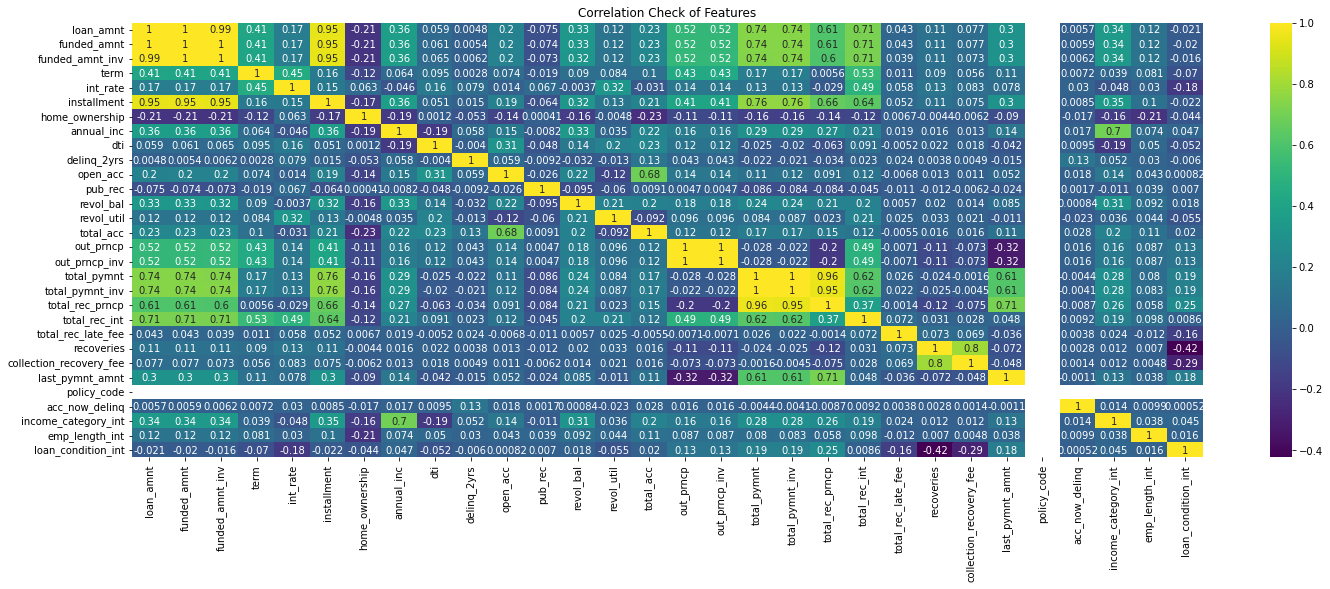

In [ ]:
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Check of Features');

In [ ]:
drop_no = {'emp_length', 'loan_status', 'loan_condition', 'income_category', 'annual_inc','policy_code', 'collection_recovery_fee'}

df.drop(drop_no, axis=1, inplace=True)

In [ ]:
df['term'].head(3)

0    36
1    60
2    36
Name: term, dtype: int64

# Creating Model

In [ ]:
len(df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
df['loan_condition_int'].value_counts()/len(df['loan_condition_int']) * 100

1    88.241798
0    11.758202
Name: loan_condition_int, dtype: float64

In [ ]:
#Mengencode Data Kategorikal

list_1=list(df.columns)
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

le=LabelEncoder()

for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
y = df['loan_condition_int']
x = df. drop('loan_condition_int', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(355959, 33)
(88990, 33)


In [ ]:
# building the model

model = Sequential()
model.add(Dense(units=78,activation='relu'))
model.add(Dense(units=39,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=48,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate=0.01) , metrics=['accuracy'])

In [ ]:


model_info = model.fit(x=X_train, 
                  y=y_train, 
                  epochs=40,
                  batch_size=512,
                  steps_per_epoch=256,
                  validation_steps=128,
                  validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
256/256 [==============================] - 4s 12ms/step - loss: 0.4620 - accuracy: 0.8811 - val_loss: 0.3677 - val_accuracy: 0.8825
Epoch 2/40
256/256 [==============================] - 2s 8ms/step - loss: 0.3618 - accuracy: 0.8831 - val_loss: 0.3605 - val_accuracy: 0.8825
Epoch 3/40
256/256 [==============================] - 1s 5ms/step - loss: 0.3565 - accuracy: 0.8833 - val_loss: 0.3561 - val_accuracy: 0.8825
Epoch 4/40
256/256 [==============================] - 1s 5ms/step - loss: 0.3511 - accuracy: 0.8838 - val_loss: 0.3508 - val_accuracy: 0.8825
Epoch 5/40
256/256 [==============================] - 1s 5ms/step - loss: 0.3492 - accuracy: 0.8813 - val_loss: 0.3430 - val_accuracy: 0.8825
Epoch 6/40
256/256 [==============================] - 1s 4ms/step - loss: 0.3357 - accuracy: 0.8836 - val_loss: 0.3325 - val_accuracy: 0.8825
Epoch 7/40
256/256 [==============================] - 1s 4ms/step - loss: 0.3261 - accuracy: 0.8820 - val_loss: 0.3184 - val_accuracy: 0.8825
Epoch

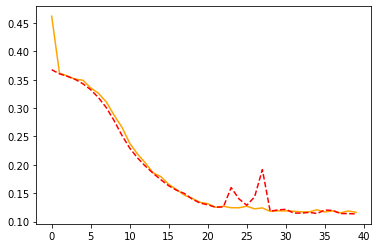

In [ ]:
plt.plot(model_info.history['loss'],
         label='train loss',
         c='orange', ls='-')
plt.plot(model_info.history['val_loss'],
         label='test loss',
         c='red',ls='--')

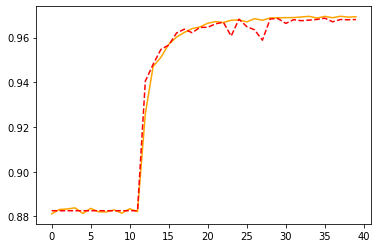

In [ ]:
plt.plot(model_info.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
plt.plot(model_info.history['val_accuracy'],
         label='test accuracy ',
         c='red',ls='--')

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     10500
           1       0.97      1.00      0.98     78490

    accuracy                           0.97     88990
   macro avg       0.98      0.87      0.91     88990
weighted avg       0.97      0.97      0.97     88990



In [ ]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,7767,2733
1,88,78402


# Simulating A new Customer

In [ ]:
import random

df_accepted = df.reset_index(drop=True)

random.seed(101)
random_ind = random.randint(0,len(df_accepted))

new_customer = df_accepted.drop('loan_condition_int',axis=1).iloc[random_ind]
new_customer

loan_amnt              10800.00
funded_amnt            10800.00
funded_amnt_inv        10800.00
term                      36.00
int_rate                  14.49
installment              371.70
grade                      2.00
home_ownership             1.00
verification_status        1.00
issue_d                   14.00
pymnt_plan                 0.00
purpose                    2.00
dti                       28.90
delinq_2yrs                1.00
open_acc                  16.00
pub_rec                    0.00
revol_bal              25235.00
revol_util                67.70
total_acc                 30.00
initial_list_status        1.00
out_prncp               6569.23
out_prncp_inv           6569.23
total_pymnt             5947.20
total_pymnt_inv         5947.20
total_rec_prncp         4230.77
total_rec_int           1716.43
total_rec_late_fee         0.00
recoveries                 0.00
last_pymnt_amnt          371.70
application_type           0.00
acc_now_delinq             0.00
income_c

In [ ]:
new_c = scaler.transform(new_customer.values.reshape(1,33))

print(f"model prediction: {(model.predict(new_c) > 0.5).astype('int32')[0][0]}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



model prediction: 1


In [ ]:
# checking if this customer paid his loan

df_accepted.loc[random_ind, 'loan_condition_int']


1

**Description**

0 = Bad Loan

1 = Good Loan